<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_SprintII(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics - Sprint II(B)
### Bruno Odon

## Descrição do problema

Instalando as bibliotecas TensorFlow e Keras

In [25]:
!pip install tensorflow
!pip install keras

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

In [28]:
!mkdir -pv datasets/{music_train,music_test}
!wget 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music_train.zip' -P datasets/
!wget 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music_test.zip' -P datasets/

mkdir: created directory 'datasets/music_test'
--2023-07-18 23:15:42--  https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music_train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10632185 (10M) [application/zip]
Saving to: ‘datasets/music_train.zip.1’

music_train.zip.1   100%[===================>]  10.14M  --.-KB/s    in 0.08s   

2023-07-18 23:15:42 (128 MB/s) - ‘datasets/music_train.zip.1’ saved [10632185/10632185]

--2023-07-18 23:15:42--  https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music_test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.

80% para treino e 20% para teste

In [32]:
dataset = 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip'
train = 'datasets/music_train.zip'
test = 'datasets/music_test.zip'
dest_train = 'datasets/music_train'
dest_test = 'datasets/music_test'
with zipfile.ZipFile(train,'r') as zip_ref:
    zip_ref.extractall(dest_train)
print(os.listdir(dest_train))
with zipfile.ZipFile(test,'r') as zip_ref:
    zip_ref.extractall(dest_test)
print(os.listdir(dest_test))

['1634117704444_Mixer mackie for sale.jpg', '1634117899869_yamaha psr2000 for sale.jpg', '1634110111179_Box Guitar Diviser for sale.jpg', '1634110346646_MAX Professional 4 Channel USB Interface  Mixer with Mobile Output for sale.jpg', '1634111875815_YAMAHA PSR  125 Electric Keyboard for sale.jpg', '1634112047058_PV SP2G TOPS speakers for sale.jpg', '1634118001110_5 String Bass Guitar for sale.jpg', '1634110942392_Piano Center Kohuwala for sale.jpg', '1634110701497_Guitargfx8 Paddle for sale.jpg', '1634113404318_Bc Original Speakers for sale.jpg', '1634117840230_Yamaha Acoustic Drum for sale.jpg', '1634118004234_Suzuki Semi Acoustic Guitars  Box for sale.jpg', '1634111149872_Yamaha Psr S700 for sale.jpg', '1634111518613_Crown Amp for sale.jpg', '1634110840753_Epiphone EJ200CE 42 Jumbo Acoustic Solid Wood Guitar for sale.jpg', '1634110987384_Yamaha SY77 Music Synthesizer for sale.jpg', '1634110230870_Electric Guitar for sale.jpg', '1634117676023_Arabic Darbuka for sale.jpg', '16341125536

In [33]:
batch_size = 32
img_height = 224
img_width = 224
num_classes = 5

In [35]:
#verificando o número de imagens que foram extraídas
path_train='datasets/music_train/'
print(f"Temos um total de {len(os.listdir(path_train))} imagens para o treinamento e avaliação do modelo de deep learning")

path_test='datasets/music_test/'
print(f"Temos um total de {len(os.listdir(path_test))} imagens para o teste do modelo de deep learning")

#exemplos de algumas imagens extraídas
print(f"Primeiras 20 imagens: \n {os.listdir(path_train)[:20]}")

#exemplos de algumas imagens extraídas
print(f"Primeiras 20 imagens: \n {os.listdir(path_test)[:20]}")

Temos um total de 2596 imagens para o treinamento e avaliação do modelo de deep learning
Temos um total de 648 imagens para o teste do modelo de deep learning
Primeiras 20 imagens: 
 ['1634117704444_Mixer mackie for sale.jpg', '1634117899869_yamaha psr2000 for sale.jpg', '1634110111179_Box Guitar Diviser for sale.jpg', '1634110346646_MAX Professional 4 Channel USB Interface  Mixer with Mobile Output for sale.jpg', '1634111875815_YAMAHA PSR  125 Electric Keyboard for sale.jpg', '1634112047058_PV SP2G TOPS speakers for sale.jpg', '1634118001110_5 String Bass Guitar for sale.jpg', '1634110942392_Piano Center Kohuwala for sale.jpg', '1634110701497_Guitargfx8 Paddle for sale.jpg', '1634113404318_Bc Original Speakers for sale.jpg', '1634117840230_Yamaha Acoustic Drum for sale.jpg', '1634118004234_Suzuki Semi Acoustic Guitars  Box for sale.jpg', '1634111149872_Yamaha Psr S700 for sale.jpg', '1634111518613_Crown Amp for sale.jpg', '1634110840753_Epiphone EJ200CE 42 Jumbo Acoustic Solid Wood Gu

In [83]:
from sklearn.preprocessing import FunctionTransformer
import re
#Criando um DataFrame com as informações das imagens

images = os.listdir(path_train)
labels, heights, widths, channels, filesize = [], [], [], [], []

# Loop que percorre cada uma das imagens extraídas
for fname in images:
    inst_type = str(fname)[14:].replace('.jpg', '').replace('for sale', '')
    print(inst_type)
    if ("Guitar" or "Guitars" or "GUITAR" or "guitar") in str(inst_type):
      name = "Guitar"
    else:
      name = inst_type
    if "Piano" in inst_type:
      name = "Piano"
    else:
      name = inst_type
    if "Keyboard" in inst_type:
      name = "Keyboard"
    else:
      name = inst_type
    if "Speaker" in inst_type:
      name = "Speaker"
    else:
      name = inst_type
    if "Mic" in inst_type:
      name = "Microfone"
    else:
      name = inst_type
    if "Bass Guitar" in inst_type:
      name = "Bass Guitar"
    else:
      name = inst_type
    if "Violin" in inst_type:
      name = "Violin"
    else:
      name = inst_type
    if ("DRUM" or "Drum" or "Drums" or "DRUMS") in inst_type:
      name = "Drums"
    else:
      name = inst_type
    labels.append(name)
    img_shape = mpimg.imread(path_train+fname).shape
    heights.append(img_shape[0])
    widths.append(img_shape[1])
    channels.append(img_shape[2])
    filesize.append(os.path.getsize(path_train+fname))

# Criação do dataset
df = pd.DataFrame({'images': images, 'class': labels, 'height': heights, 'width': widths, 'channels': channels, 'filesize': filesize})

df.head(50)

Mixer mackie 
yamaha psr2000 
Box Guitar Diviser 
MAX Professional 4 Channel USB Interface  Mixer with Mobile Output 
YAMAHA PSR  125 Electric Keyboard 
PV SP2G TOPS speakers 
5 String Bass Guitar 
Piano Center Kohuwala 
Guitargfx8 Paddle 
Bc Original Speakers 
Yamaha Acoustic Drum 
Suzuki Semi Acoustic Guitars  Box 
Yamaha Psr S700 
Crown Amp 
Epiphone EJ200CE 42 Jumbo Acoustic Solid Wood Guitar 
Yamaha SY77 Music Synthesizer 
Electric Guitar 
Arabic Darbuka 
Yamaha PSR E333 Keyboard 
behringer 24 channel mixer 
Guitar Stand 
Yamaha C40 
Sounds Setup Set 
Laviere Box Guitar 40 
Olan 450W Buffels with Amplifier 
DJ Control Mahion 
Electric Guitar Aria Pro 2 STGSeries 
A666 Uhf Wireless Mic 
Microphone Stand Type 
Brand New Acoustic Guitar 
YGY DRUM SET 
Yamaha Clavinova YDP223 Digital Piano 
Tascam interface 
Guitar 
Keyboard 
Yamaha Equalizer 
Zoom H2n Voice Recorder 
Roland SPD 20 Octapad 
Amplifier Vot 100 
Bass Guitar 
+á-╢-£+á-╖-Æ+á-╢-º+á-╖-Å+á-╢-++á-╖-è +á-╢-▌+á-╖-É+á-╢-⌐+á-╢-╜+á

,images,class,height,width,channels,filesize
0,1634117704444_Mixer mackie for sale.jpg,Mixer mackie,107,142,3,5048
1,1634117899869_yamaha psr2000 for sale.jpg,yamaha psr2000,107,142,3,4183
2,1634110111179_Box Guitar Diviser for sale.jpg,Box Guitar Diviser,107,142,3,4185
3,1634110346646_MAX Professional 4 Channel USB I...,MAX Professional 4 Channel USB Interface Mixe...,107,142,3,3147
4,1634111875815_YAMAHA PSR 125 Electric Keyboar...,YAMAHA PSR 125 Electric Keyboard,107,142,3,4432
5,1634112047058_PV SP2G TOPS speakers for sale.jpg,PV SP2G TOPS speakers,107,142,3,2455
6,1634118001110_5 String Bass Guitar for sale.jpg,5 String Bass Guitar,107,142,3,4218
7,1634110942392_Piano Center Kohuwala for sale.jpg,Piano Center Kohuwala,107,142,3,5028
8,1634110701497_Guitargfx8 Paddle for sale.jpg,Guitargfx8 Paddle,107,142,3,4563
9,1634113404318_Bc Original Speakers for sale.jpg,Bc Original Speakers,107,142,3,2968


Guitar                           59
Box Guitar                       27
Violin                           23
Classical Guitar                 20
Bass Guitar                      13
                                 ..
High Power karaoke Speaker        1
Speaker Party Box                 1
BM800 Full set                    1
Gemini 700                        1
Ibanez Rg Series Lead Guitar      1
Name: class, Length: 2214, dtype: int64


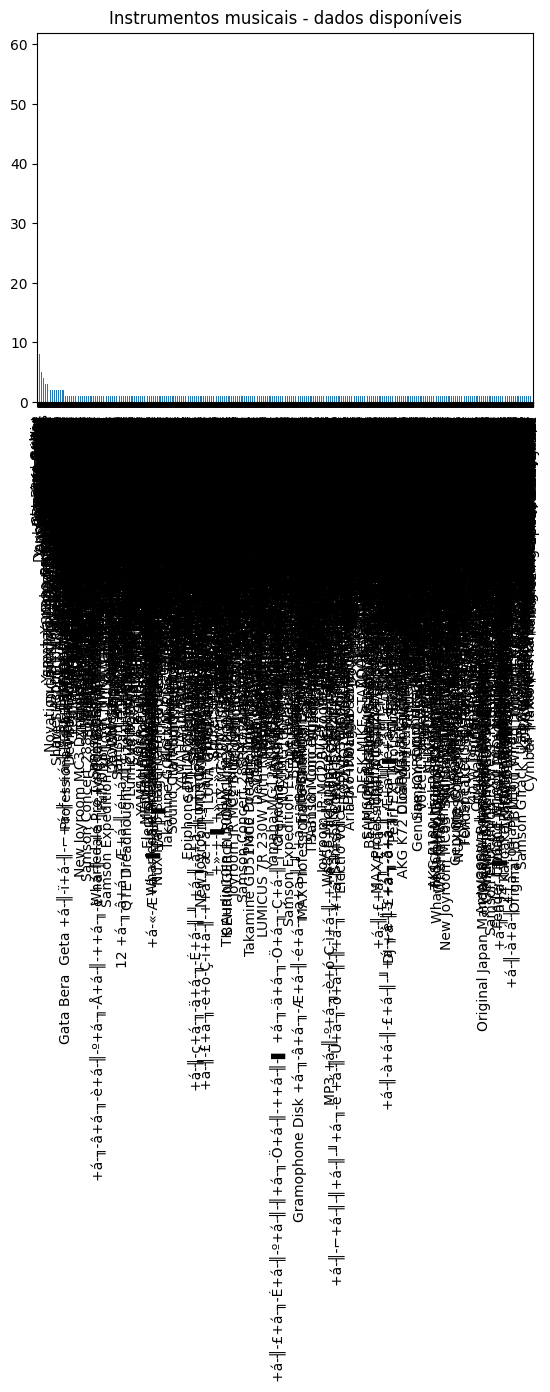

In [84]:
#Visualizando a proporção de imagens por classe
print((df['class']).value_counts())
instruments_count = df['class'].value_counts().plot.bar(title='Instrumentos musicais - dados disponíveis')